In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.metrics

In [3]:
data = pd.read_csv('/content/drive/MyDrive/College/PS - 1/Notebooks/manuscript/models/comparison/unnormalized.csv')
data.drop(columns=['Unnamed: 0'], inplace = True)
data

,Age,Gender,BMI,Symptoms Present?,Fever,Cough,Breathlessness,Travel History,Temp,SPO2,Contact to NCOVID Patient,Co-morbidity?,Diabetes,Hypertension,Heart Condition,Respiratory rate(breaths per minute),Outcome,qSOFA SCORE,HEMOGLOBIN,TLC COUNT,PLATELET COUNT,RANDOM BLOOD SUGAR,UREA,CREATININE,SODIUM,POTASSIUM,CHLORIDE,TOTAL BILIRUBIN,DIRECT BILIRUBIN,SGOT,SGPT,TOTAL PROTEINS,ALBUMIN,ALKALINE PHOSPHATASE,C-REACTIVE PROTEINS
0,53,1,22.5,1,1,1,1,0,96.8,99.0,1,0,0,0,0,20.0,0.0,0.0,15.9,6200.0,127000.0,121.0,47.5,1.3,143.0,4.8,108.0,0.5,0.2,81.3,70.0,5.9,3.8,44.1,58.10
1,26,0,25.7,0,0,0,0,0,98.7,98.0,1,0,0,0,0,16.0,0.0,0.0,13.4,4140.0,188000.0,96.0,21.8,1.0,148.0,4.1,108.0,0.3,0.1,22.2,14.8,6.6,3.9,58.5,3.66
2,28,1,22.2,0,0,0,0,0,98.4,98.0,1,0,0,0,0,16.0,0.0,0.0,15.9,4680.0,231000.0,102.0,18.3,5800.0,159.0,18.1,1.1,0.8,0.3,19.3,12.8,7.0,4.2,86.0,10.17
3,73,1,21.5,1,1,1,1,0,98.0,98.0,1,0,0,0,0,26.0,1.0,1.0,13.2,5200.0,234000.0,119.0,36.6,0.9,140.0,4.2,104.0,2.4,1.2,59.0,47.9,6.3,3.7,120.0,168.90
4,49,1,27.4,1,1,1,0,0,101.0,98.0,1,1,0,0,0,20.0,0.0,0.0,13.7,9500.0,321000.0,92.0,22.0,0.9,124.0,3.8,92.0,4.2,2.1,44.6,55.5,5.9,3.1,177.0,164.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,53,1,27.2,1,1,1,1,0,98.9,96.0,1,1,1,1,0,28.0,1.0,1.0,18.2,6700.0,101000.0,200.0,54.1,0.9,136.0,2.9,97.0,1.4,0.5,43.8,38.8,6.2,3.7,73.3,127.60
171,33,1,26.0,1,1,1,1,0,99.3,98.0,1,1,1,0,0,28.0,1.0,1.0,13.9,6800.0,156000.0,151.0,59.6,1.9,141.0,4.2,106.0,0.5,0.2,80.6,42.6,6.6,3.8,57.4,138.15
172,70,1,21.4,1,1,0,1,0,98.3,99.0,0,1,0,0,0,20.0,1.0,0.0,14.9,8900.0,1820000.0,189.0,25.2,1.1,137.0,4.2,106.0,1.8,0.6,77.0,27.9,5.9,3.3,60.1,143.00
173,65,0,22.4,1,0,1,1,0,98.9,97.0,0,1,1,1,0,32.0,1.0,1.0,11.2,12000.0,124000.0,210.0,43.2,1.3,132.0,3.8,110.0,1.2,0.6,56.2,43.2,5.6,3.4,216.0,124.00


In [4]:
def algorithm_pipeline(x_train,y_train, model, param_grid, cv = 5, scoring_fit = 'f1'):
    
    gs = GridSearchCV(
        estimator = model,
        param_grid = param_grid, 
        cv = cv, 
        n_jobs = -1, 
        scoring = scoring_fit,
        verbose = 1
    )
    fitted_model = gs.fit(x_train, y_train)
    
    return gs.best_params_

# Splitting the Dataset

It is crucial to split the
data before performing any further transformations such as scaling the data because we
want to prevent any information about the test set to spill over into our training and
validation set. Data scaling is often done using statistics about the data set as a whole,
such as mean and standard deviation. Because we want to be able to measure how well
our Machine Learning models perform on data they have never seen before we have to
make sure that no information from the test data impacts how the scaling or any other
transformation is done.

Before we do any further analysis using our data we need to split the entire data set into
three different subsets: training set, validation set and test set.


First we make a hold-out testing set (20% of the data). We split the remaining data into a training and a validation set. This allows us to train
our models on the training data and then evaluate their performance on the validation
data. In theory, we can then go and tweak our models and evaluate them on the
validation data again and thereby find ways to improve model performance.

In [5]:
X = data.drop(['Outcome'],axis=1)
Y = data['Outcome']

#splitting into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

#splitting into train and validation set
# x_train, x_valid, y_train, y_valid = train_test_split(x_train_temp, y_train_temp, test_size = 0.25, random_state = 42)

## Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform using the training data
scaler.fit_transform(x_train)
# Transform the validation and test features
scaler.transform(x_test)

array([[3.49397590e-01, 1.00000000e+00, 6.20689655e-01, ...,
        4.44444444e-01, 2.58578856e-01, 9.45129955e-04],
       [3.13253012e-01, 0.00000000e+00, 5.28735632e-01, ...,
        4.44444444e-01, 1.61178510e-01, 6.74717774e-03],
       [2.89156627e-01, 1.00000000e+00, 3.21839080e-01, ...,
        7.22222222e-01, 1.13344887e-01, 4.41060646e-03],
       ...,
       [8.07228916e-01, 0.00000000e+00, 3.21839080e-01, ...,
        5.00000000e-01, 2.08318891e-01, 1.05014439e-03],
       [6.50602410e-01, 1.00000000e+00, 1.00000000e+00, ...,
        4.44444444e-01, 8.80415945e-02, 1.49645576e-03],
       [5.90361446e-01, 1.00000000e+00, 3.33333333e-01, ...,
        3.33333333e-01, 2.39861352e-01, 7.14098189e-02]])

## Feature Selection

[0.04550679 0.01396379 0.02309899 0.00219665 0.00926818 0.01697187
 0.06483165 0.00788392 0.01334029 0.02083613 0.01729711 0.01526737
 0.01030745 0.01758923 0.01027466 0.13778363 0.04724459 0.01674511
 0.04727856 0.03543154 0.01642983 0.03393397 0.02817377 0.01749112
 0.02002972 0.03200897 0.02334796 0.02369059 0.03672037 0.01947796
 0.03077878 0.01449388 0.02657146 0.10373413]


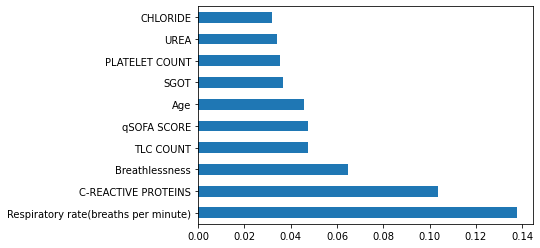

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [8]:
features = ['C-REACTIVE PROTEINS','Respiratory rate(breaths per minute)','Breathlessness','TLC COUNT','Age','SGOT','UREA']

In [9]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200]
}

bestparams = algorithm_pipeline(x_train[features], y_train, model, param_grid)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.6min finished


In [10]:
bestparams

{'max_depth': 20, 'max_leaf_nodes': 50, 'n_estimators': 1000}

In [11]:
model = LogisticRegression(max_iter = 8000)
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
'penalty' : ['l2'],
'C' : [300, 100, 30, 10, 3, 1.0, 0.3, 0.1, 0.03, 0.01]} 

bestparams = algorithm_pipeline(x_train[features], y_train, model, param_grid)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.9s finished
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

In [12]:
bestparams

{'C': 3, 'penalty': 'l2', 'solver': 'newton-cg'}

In [13]:
mlp = MLPClassifier(max_iter=8000)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,100)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['lbfgs','sgd'],
    'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
    'learning_rate': ['constant','adaptive','invscaling'],
}
bestparams = algorithm_pipeline(x_train[features], y_train, mlp, param_grid)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 747 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1891 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 12.2min finished


In [14]:
bestparams

{'activation': 'logistic',
 'alpha': 0.3,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}

In [16]:
svm = SVC()
param_grid = {'C': [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000], 
              'gamma': [3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001, 'scale','auto'],
              'kernel': ['rbf','linear','sigmoid','poly']} 

bestparams = algorithm_pipeline(x_train[features], y_train, svm, param_grid)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
bestparams

In [18]:
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
bestparams = algorithm_pipeline(x_train[features], y_train, xgb, param_grid)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  4.2min finished


Now define all the models

In [ ]:
rf = RandomForestClassifier(max_depth = 25, max_leaf_nodes = 50, n_estimators = 400)

In [19]:
# Define a function that compares the CV perfromance of a set of predetrmined models 
def cv_comparison(models, X, y, cv):
    
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='f1', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='roc_auc', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
        
    cv_accuracies.index = ['F1 Score', 'ROC-AUC', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [ ]:
bkjkjkjb